<a href="https://colab.research.google.com/github/juicyrohan/MAI-python/blob/main/SVM_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec


In [ ]:
X, y = make_moons(n_samples=500, noise=0.1)
# сохраним значения X и y для визуализации
X1 = X
y1 = y

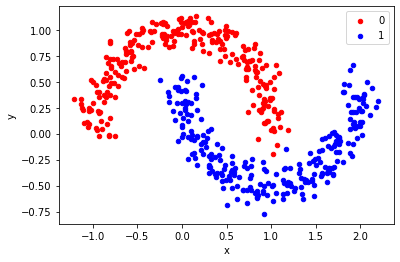

In [ ]:
# визуализируем датасет
df = pd.DataFrame(dict(x=X[:, 0], y=X[:,1], label=y))
colors = {0: 'red', 1: 'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

In [ ]:
target = df.label
df.drop(['label'], axis=1, inplace=True)

In [ ]:
y = target
X = df

In [ ]:
#разбиваем датасет для обучения и валидации
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state=1)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((400, 2), (100, 2), (400,), (100,))

In [ ]:
# определяем модель - сначала ядро линейное, потом радиальная базисная функция
clf1 = SVC(kernel='linear')
clf2 = SVC(kernel='rbf')
model1 = clf1.fit(X_train, y_train)
model2 = clf2.fit(X_train, y_train)

In [ ]:
#print(model1.score(X_train, y_train))
#print(model2.score(X_train, y_train))

In [ ]:
# получаем значения из обученной модели
y_pred1 = model1.predict(X_val)
y_pred2 = model2.predict(X_val)

#print(model1.score(X_val, y_val))
#print(model2.score(X_val, y_val))

In [ ]:
# определяем метрики
score_list = accuracy_score, precision_score, recall_score
acc_prec_rec = [[score(y_val, y_pred) for score in score_list] for y_pred in [y_pred1, y_pred2]]
acc_prec_rec

[[0.89, 0.9333333333333333, 0.84], [1.0, 1.0, 1.0]]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


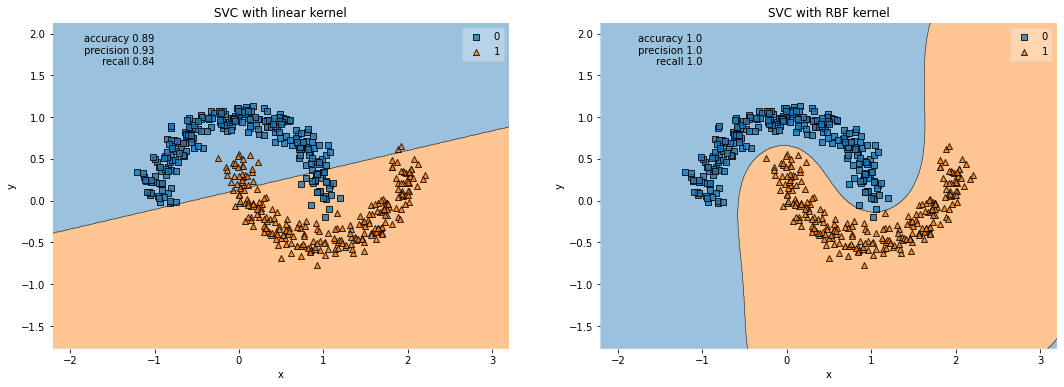

In [ ]:
# визуализируем результаты

labels = ['SVC with linear kernel', 'SVC with RBF kernel']
fig = plt.figure(figsize=(18, 6))
gs = gridspec.GridSpec(1, 2)

for clf, lab, apr, i in zip([clf1, clf2], labels, acc_prec_rec, [0, 1]):
    ax = plt.subplot(gs[0, i])
    ax.text(x=-1, y=2, s=f'accuracy {apr[0]:.2}\n precision {apr[1]:.2}\n recall {apr[2]:.2}', horizontalalignment='right',
verticalalignment='top')
    fig = plot_decision_regions(X=X1, y=y1, clf=clf)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.title(lab)
